In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# On vérifie que les fichiers train.csv et test.csv sont bien chargés.
# print(df_train) 
# print(df_test)

# Afficher les types de données des colonnes
print('Afficher les types de données des colonnes :')
print(df_train.dtypes)

print('---------------------------------------')

# Vérifier les valeurs manquantes dans le DataFrame et les additionner
print('Vérifier les valeurs manquantes additionnées dans le DataFrame :')
print(df_train.isna().sum())

print('---------------------------------------')

Afficher les types de données des colonnes :
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
---------------------------------------
Vérifier les valeurs manquantes additionnées dans le DataFrame :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------------------------------


In [2]:
# Afficher les statistiques descriptives du DataFrame
print('Statistiques descriptives du DataFrame :')
print(df_train.describe())

Statistiques descriptives du DataFrame :
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [3]:
# Afficher les informations du DataFrame
print('Informations sur le DataFrame :')
df_train.info()

print('---------------------------------------')

# Afficher les 5 premières lignes du DataFrame
print('Les 5 premières lignes du DataFrame :')
df_train.head(5)

Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
---------------------------------------
Les 5 premières lignes du DataFrame :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Filtrer les passagers qui n'ont pas survécu
df_train_filtered = df_train.query('Survived == False')

print(df_train_filtered)

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
6              7         0       1                   McCarthy, Mr. Timothy J   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

In [5]:
# Répartition des passagers par tranches d'âges
fig_reparti_age_passager = px.histogram(df_train, x='Age', nbins=30, title='Répartition des passagers par tranches d\'âge')
fig_reparti_age_passager.update_layout(xaxis_title='Âge', yaxis_title='Nombre de passagers')
fig_reparti_age_passager.show() 

In [6]:
# Compter le nombre d'hommes et de femmes sur le Titanic

# Créer une nouvelle colonne avec des labels explicites
df_train['Sex_label'] = df_train['Sex'].map({'male': 'Homme', 'female': 'Femme'})

# Afficher la répartition des passagers par sexe
fig_total_sexe = px.histogram(
    df_train,
    x='Sex_label',
    color='Sex_label',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    labels={'Sex_label': 'Sexe'},
    title="Répartition des passagers par sexe",
)

# Ajouter le nombre de passagers par sexe
fig_total_sexe.update_layout(
    xaxis_title="Sexe",
    yaxis_title="Nombre de passagers",
    bargap=0.4,
    height=600
)

# Afficher le graphique
fig_total_sexe.show()

In [7]:
# Compter le nombre de survivants et de décès selon le sexe

# Créer une nouvelle colonne avec des labels explicites
df_train['Survived_label'] = df_train['Survived'].map({0: 'Mort', 1: 'Survécu'})

# Créer le graphique de la répartition des survivants et des décès selon le sexe
fig_survie_sexe = px.histogram( 
    df_train,
    x='Sex_label',
    color='Survived_label',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Nombre de survivants et de décès selon le sexe",
    labels={'Survived_label': 'Statut de survie'},
    category_orders={
        'Sex_label': ['Homme', 'Femme'],
        'Survived_label': ['Survécu', 'Mort']
    }
)

# Update le graphique avec les titres des axes et la hauteur
fig_survie_sexe.update_layout(
    xaxis_title="Sexe",
    yaxis_title="Nombre de passagers",
    bargap=0.4,
    height=600
)

# Afficher le graphique
fig_survie_sexe.show()

In [8]:
# 1. Créer des tranches d'âge larges (10 ans)
bins = range(0, 90, 10)
labels = [f'{i}-{i+10}' for i in bins[:-1]]
df_train['AgeBin'] = pd.cut(df_train['Age'], bins=bins, labels=labels)

# 2. Grouper par AgeBin et Sex
grouped = df_train.groupby(['AgeBin', 'Sex', 'Survived']).size().reset_index(name='Count')

# 3. Total par AgeBin + Sex (pourcentage global sur chaque groupe)
grouped['Total'] = grouped.groupby(['AgeBin', 'Sex'])['Count'].transform('sum')
grouped['Percentage'] = grouped['Count'] / grouped['Total'] * 100

# 4. Remplacement de Survived pour affichage
grouped['Survived'] = grouped['Survived'].map({0: 'Mort', 1: 'Vivant'})

# 5. Ordre personnalisé
category_order = {'AgeBin': labels, 'Survived': ['Mort', 'Vivant']}

# 6. Affichage en barres empilées (stacked)
fig_survived_per_age = px.bar(
    grouped,
    x='AgeBin',
    y='Percentage',
    color='Survived',
    barmode='stack',
    facet_col='Sex',
    labels={
        'AgeBin': 'Tranche d\'âge',
        'Percentage': 'Pourcentage (stacked)',
        'Survived': 'Statut'
    },
    title='Répartition des morts et survivants par tranche d’âge et par sexe',
    category_orders=category_order,
    color_discrete_map={
        'Mort': '#d62728',    # rouge
        'Vivant': '#1f77b4'   # bleu
    }
)

fig_survived_per_age.update_layout(
    yaxis_title='Pourcentage (100% par tranche d’âge et sexe)',
    xaxis_title='Tranche d\'âge',
    bargap=0.05
)

fig_survived_per_age.show()

/tmp/ipykernel_30264/904339034.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_30264/904339034.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [9]:
# Répartition de la survie selon le sexe (graphique circulaire et pourcentages)

# Données hommes et femmes
df_hommes = df_train[df_train['Sex'] == 'male']
df_femmes = df_train[df_train['Sex'] == 'female']

# Compter les occurrences
hommes_counts = df_hommes['Survived_label'].value_counts().reindex(['Survécu', 'Mort'], fill_value=0)
femmes_counts = df_femmes['Survived_label'].value_counts().reindex(['Survécu', 'Mort'], fill_value=0)

# Créer le graphique circulaire pour la répartition de la survie selon le sexe
fig_camembert = make_subplots(        # Création de la figure avec deux domaines pour les camenberts
    rows=1, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=["Hommes", "Femmes"]
)

# Définir les couleurs dans l’ordre des labels : ['Survécu', 'Mort']
colors_inverses = ['blue', 'red']  # Survécu = rouge, Mort = bleu

# Ajout du graphique pour les hommes
fig_camembert.add_trace(go.Pie(
    labels=hommes_counts.index,
    values=hommes_counts.values,
    name="Hommes",
    marker=dict(colors=colors_inverses),
    textinfo='percent+label'
), row=1, col=1)

# Ajout du graphique pour les femmes
fig_camembert.add_trace(go.Pie(
    labels=femmes_counts.index,
    values=femmes_counts.values,
    name="Femmes",
    marker=dict(colors=colors_inverses),
    textinfo='percent+label'
), row=1, col=2)

# Mise en page finale
fig_camembert.update_layout(
    title_text="Répartition de la survie selon le sexe",
    title_x=0.5,
    height=500
)

fig_camembert.show()

In [10]:
# Répartition en pourcentage des passagers par classe et survie
# Préparation des données groupées
grouped = (
    df_train
    .groupby(['Pclass', 'Survived'])
    .size()
    .reset_index(name='Count')
)

# Calcul du pourcentage par classe
grouped['Total'] = grouped.groupby('Pclass')['Count'].transform('sum')
grouped['Pourcentage'] = 100 * grouped['Count'] / grouped['Total']

# Création des labels
grouped['Survived_label'] = grouped['Survived'].map({0: 'Mort', 1: 'Vivant'})
grouped['Pclass'] = grouped['Pclass'].astype(str)

# Création du graphique
fig_survie_par_classe = px.bar(
    grouped,
    x='Pclass',
    y='Pourcentage',
    color='Survived_label',
    text=grouped['Pourcentage'].round(1).astype(str) + '%',
    color_discrete_map={'Mort': 'lightcoral','Vivant': 'lightgreen'},
    barmode='stack',
    labels={
        'Pclass': 'Classe',
        'Pourcentage': 'Pourcentage (%)',
        'Survived_label': 'Statut de survie'
    },
    title='Répartition en % des passagers par classe et survie'
)

fig_survie_par_classe.update_layout(
    yaxis_title='Pourcentage (%)',
    xaxis_title='Classe',
    height=600,
    bargap=0.5
)

fig_survie_par_classe.show()

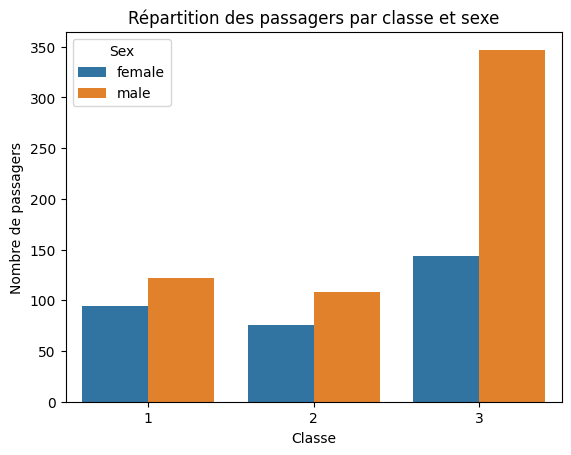

In [11]:
# Répartition des passagers par classe et par sexe
sns.countplot(data=df_train, x="Pclass", hue="Sex")
plt.title("Répartition des passagers par classe et sexe")
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.show()

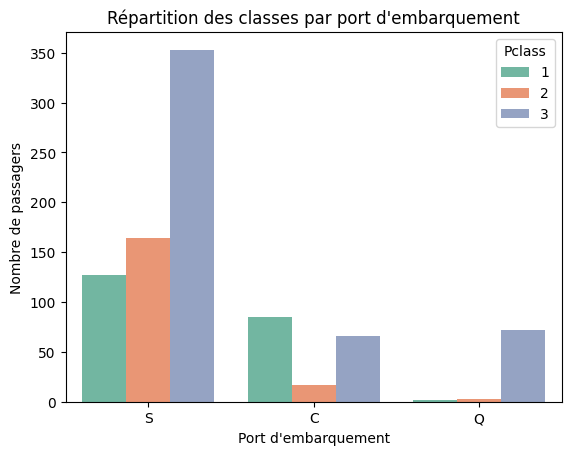

In [12]:
# Voir la relation entre la classe et le lieu d'embarcation.
sns.countplot(data=df_train,x="Embarked",hue="Pclass", dodge=True,palette="Set2")
plt.title("Répartition des classes par port d'embarquement")
plt.xlabel("Port d'embarquement")
plt.ylabel("Nombre de passagers")
plt.show()

In [13]:
# Création des colonnes utiles
df_train['Accompanied'] = ((df_train['SibSp'] + df_train['Parch']) > 0).astype(int)
df_train['Survived_label'] = df_train['Survived'].map({0: 'Mort', 1: 'Vivant'})
df_train['Accompanied_label'] = df_train['Accompanied'].map({0: 'Non', 1: 'Oui'})
df_train['Pclass'] = df_train['Pclass'].astype(int)
df_train['Sex_label'] = df_train['Sex'].map({'male': 'Hommes', 'female': 'Femmes'})

# Séparation hommes / femmes
df_hommes = df_train[df_train['Sex_label'] == 'Hommes']
df_femmes = df_train[df_train['Sex_label'] == 'Femmes']

# Cette fonction prend un DataFrame et retourne un DataFrame avec les pourcentages de survie selon l'accompagnement et la classe
# Elle regroupe les données par classe, accompagnement et survie, puis calcule le pourcentage de survie pour chaque groupe
def create_percentage_df(df):
    grouped = (
        df
        .groupby(['Pclass', 'Accompanied_label', 'Survived_label'])
        .size()
        .reset_index(name='Count')
    )
    grouped['Total'] = grouped.groupby(['Pclass', 'Accompanied_label'])['Count'].transform('sum')
    grouped['Pourcentage'] = 100 * grouped['Count'] / grouped['Total']
    return grouped

# Calcul des pourcentages
grouped_hommes = create_percentage_df(df_hommes)
grouped_femmes = create_percentage_df(df_femmes)

# Graphique hommes
fig_hommes = px.bar(
    grouped_hommes,
    x='Accompanied_label',
    y='Pourcentage',
    color='Survived_label',
    color_discrete_map={'Mort': 'lightcoral','Vivant': 'lightgreen'},
    facet_col='Pclass',
    barmode='stack',
    text=grouped_hommes['Pourcentage'].round(1).astype(str) + '%',
    labels={
        'Accompanied_label': 'Accompagné',
        'Pourcentage': 'Pourcentage',
        'Survived_label': 'Statut de survie',
        'Pclass': 'Classe'
    },
    title='Hommes : taux de survie selon l\'accompagnement et la classe (en %)'
)

# Graphique femmes
fig_femmes = px.bar(
    grouped_femmes,
    x='Accompanied_label',
    y='Pourcentage',
    color='Survived_label',
    color_discrete_map={'Mort': 'lightcoral','Vivant': 'lightgreen'},
    facet_col='Pclass',
    barmode='stack',
    text=grouped_femmes['Pourcentage'].round(1).astype(str) + '%',
    labels={
        'Accompanied_label': 'Accompagné',
        'Pourcentage': 'Pourcentage',
        'Survived_label': 'Statut de survie',
        'Pclass': 'Classe'
    },
    title='Femmes : taux de survie selon l\'accompagnement et la classe (en %)'
)

# Mise en page des graphiques
for fig in [fig_hommes, fig_femmes]:
    fig.update_layout(
        yaxis_title='Pourcentage (%)',
        xaxis_title='Accompagné',
        height=600,
        bargap=0.3
    )

fig_hommes.show()
fig_femmes.show()

In [14]:
# S'assurer que la colonne Accompanied est bien définie
df_train['Accompanied'] = ((df_train['SibSp'] + df_train['Parch']) > 0).astype(int)

# Calcul de la médiane de l’âge par combinaison Sex / Pclass / Accompanied
median_age = df_train.groupby(['Sex', 'Pclass', 'Accompanied'])['Age'].median()

# Affichage du résultat
print(median_age)

Sex     Pclass  Accompanied
female  1       0              32.50
                1              35.00
        2       0              32.25
                1              25.50
        3       0              22.00
                1              19.50
male    1       0              45.00
                1              37.00
        2       0              30.00
                1              29.00
        3       0              27.00
                1              17.50
Name: Age, dtype: float64


In [15]:
# Transformer la colonne 'Sex' en entier binaire : male = 1, female = 0
df_train['male'] = (df_train['Sex'] == 'male').astype(int)

# Supprimer l’ancienne colonne 'Sex'
# df_train = df_train.drop(columns=['Sex'])  # optionnel

# Vérifier le résultat
print(df_train[['male']].head())

   male
0     1
1     0
2     0
3     0
4     1


In [16]:
# Vérification des valeurs manquantes dans la colonne 'Embarked'

# Affiche les lignes concernées
df_train[df_train['Embarked'].isna()]

# On sait que la classe était 1 et le billet coûte 80
# On va borner avec les valeurs connus pour trouver des concordances 
df_train[
    (df_train['Pclass'] == 1) &     # On veut cibler les personnes de la classe 1
    (df_train['Fare'].between(75, 85)) &    # On borne dans un tarif compris entre 75 et 85 
    (df_train['Embarked'].notna()) &    # On veut prendre que les valeurs connues dans 'Embarked' 
    (df_train['Sex'] == 'female')     # On filtre que pour les femmes
][['Embarked', 'Fare', 'Pclass', 'Sex']]['Embarked'].value_counts()  # On prend en compte toutes les sélections et on compte le nombre d'occurence identiques pour 'Embarked'


# On remplace la valeur NaN par la valeur 'C' suite à l'analyse précédente
df_train['Embarked'] = df_train['Embarked'].fillna('C')

# Compléter les valeurs manquantes de 'Embarked' par analyse contextuelle
df_train.loc[df_train['Embarked'].isna(), 'Embarked'] = 'C'

In [17]:
# On vérifie les titres de chaque passager

# Extraire le titre avec une regex
df_train['Title'] = df_train['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

# On regroupe les titres uniques entre-eux
df_train['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [18]:
# Calcul de la médiane de l’âge par combinaison Sex / Pclass / Accompanied
df_median=df_train.copy()

median_age_simple = (
    df_median
    .groupby(['Sex', 'Pclass', 'Accompanied'])['Age']
    .median()
    .reset_index()
    .sort_values(by=['Sex', 'Pclass', 'Accompanied'])
    .rename(columns={
        'Sex': 'Sexe',
        'Pclass': 'Classe',
        'Accompanied': 'Accompagné',
        'Age': 'Âge médian'
    })
)

# Affichage propre du tableau
print("\nMédiane de l'âge selon le sexe, la classe et l'accompagnement :\n")
print(median_age_simple.to_string(index=False))


Médiane de l'âge selon le sexe, la classe et l'accompagnement :

  Sexe  Classe  Accompagné  Âge médian
female       1           0       32.50
female       1           1       35.00
female       2           0       32.25
female       2           1       25.50
female       3           0       22.00
female       3           1       19.50
  male       1           0       45.00
  male       1           1       37.00
  male       2           0       30.00
  male       2           1       29.00
  male       3           0       27.00
  male       3           1       17.50


In [19]:
# Médiane de l'âge par combinaison Sex / Pclass / Accompanied
median_age_simple = (
    df_median
    .groupby(['Sex', 'Pclass', 'Accompanied'])['Age']
    .median()
    .reset_index()
    .rename(columns={
        'Sex': 'Sexe',
        'Pclass': 'Classe',
        'Accompanied': 'Accompagné',
        'Age': 'Âge médian'
    })
)

print("\nMédiane de l'âge selon le sexe, la classe et l'accompagnement :\n")
print(median_age_simple.sort_values(by=['Sexe', 'Classe', 'Accompagné']).to_string(index=False))

# Médiane détaillée d’âge selon Sex + Title + Pclass + Accompanied (pour les titres les plus fréquents)
selected_titles = ['Master', 'Mrs', 'Miss', 'Mr']
df_median_filtered = df_median[df_median['Title'].isin(selected_titles)]

median_age_detailed = (
    df_median_filtered
    .groupby(['Sex', 'Title', 'Pclass', 'Accompanied'])['Age']
    .median()
    .reset_index()
    .rename(columns={'Age': 'Age_median'})
    .sort_values(by=['Sex', 'Title', 'Pclass', 'Accompanied'])
)

print("\nMédiane de l'âge selon le sexe, le titre, la classe et l'accompagnement :\n")
print(median_age_detailed.to_string(index=False))

# Création du dictionnaires pour l'imputation
# (on garde le dictionnaire par Titre/Classe/Sexe mais on ne l'affiche plus)
median_age_title = (
    df_median_filtered
    .groupby(['Title', 'Pclass', 'Sex'])['Age']
    .median()
    .reset_index()
    .rename(columns={
        'Title': 'Titre',
        'Pclass': 'Classe',
        'Sex': 'Sexe',
        'Age': 'Âge médian'
    })
)

median_age_title_dict = median_age_title.set_index(
    ['Titre', 'Classe', 'Sexe']
)['Âge médian'].to_dict()

median_age_detailed_dict = median_age_detailed.set_index(
    ['Sex', 'Title', 'Pclass', 'Accompanied']
)['Age_median'].to_dict()

median_age_simple_dict = median_age_simple.set_index(
    ['Sexe', 'Classe', 'Accompagné']
)['Âge médian'].to_dict()

# Fonction d'imputation d'âge
def impute_age(row):
    if pd.notna(row['Age']):
        return row['Age']

    # Médiane détaillée (Sex, Title, Pclass, Accompanied)
    key_detailed = (row['Sex'], row['Title'], row['Pclass'], row['Accompanied'])
    if key_detailed in median_age_detailed_dict:
        return median_age_detailed_dict[key_detailed]

    # Médiane par Titre, Classe, Sexe
    key_title = (row['Title'], row['Pclass'], row['Sex'])
    if key_title in median_age_title_dict:
        return median_age_title_dict[key_title]

    # Médiane simple par Sex, Classe, Accompagné
    key_simple = (row['Sex'], row['Pclass'], row['Accompanied'])
    if key_simple in median_age_simple_dict:
        return median_age_simple_dict[key_simple]

    # Médiane générale
    return df_train['Age'].median()

# Application de l’imputation
df_median['Age'] = df_median.apply(impute_age, axis=1)

print("\nExemple passager index 766 :")
print(df_median.loc[766, ['Name', 'Sex', 'Pclass', 'Accompanied', 'Title', 'Age']])

# Répartition des passagers par tranches d'âges
fig_reparti_age_passager = px.histogram(df_train, x='Age', nbins=30, title='Répartition des passagers par tranches d\'âge')
fig_reparti_age_passager.update_layout(xaxis_title='Âge', yaxis_title='Nombre de passagers')
fig_reparti_age_passager.show() 

# Répartition des passagers par tranches d'âges après imputation
fig_reparti_age_passager_fill = px.histogram(df_median, x='Age', nbins=30, title='Répartition des passagers par tranches d\'âge après imputation')
fig_reparti_age_passager_fill.update_layout(xaxis_title='Âge', yaxis_title='Nombre de passagers')
fig_reparti_age_passager_fill.show() 



Médiane de l'âge selon le sexe, la classe et l'accompagnement :

  Sexe  Classe  Accompagné  Âge médian
female       1           0       32.50
female       1           1       35.00
female       2           0       32.25
female       2           1       25.50
female       3           0       22.00
female       3           1       19.50
  male       1           0       45.00
  male       1           1       37.00
  male       2           0       30.00
  male       2           1       29.00
  male       3           0       27.00
  male       3           1       17.50

Médiane de l'âge selon le sexe, le titre, la classe et l'accompagnement :

   Sex  Title  Pclass  Accompanied  Age_median
female   Miss       1            0        31.0
female   Miss       1            1        22.0
female   Miss       2            0        30.0
female   Miss       2            1         7.5
female   Miss       3            0        22.0
female   Miss       3            1         9.0
female    Mrs       1 

In [20]:
# Suppression des colonnes non utiles

df_median = df_median.drop(['Sex_label', 'Survived_label', 'AgeBin', 'Cabin', 'Ticket', 'Sex', 'Name', 'Accompanied_label'], axis=1)
print(df_median.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Accompanied  891 non-null    int64  
 9   male         891 non-null    int64  
 10  Title        891 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB
None


In [21]:
# Encodage des colonnes categoriques en variables numériques

df_median = pd.get_dummies(df_median, columns=['Title', 'Embarked'], drop_first=False)
print(df_median.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Age                 891 non-null    float64
 4   SibSp               891 non-null    int64  
 5   Parch               891 non-null    int64  
 6   Fare                891 non-null    float64
 7   Accompanied         891 non-null    int64  
 8   male                891 non-null    int64  
 9   Title_Capt          891 non-null    bool   
 10  Title_Col           891 non-null    bool   
 11  Title_Don           891 non-null    bool   
 12  Title_Dr            891 non-null    bool   
 13  Title_Jonkheer      891 non-null    bool   
 14  Title_Lady          891 non-null    bool   
 15  Title_Major         891 non-null    bool   
 16  Title_Ma

In [22]:
# Appliquer les transformations avec le df_median à df_train

df_train = df_median
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Age                 891 non-null    float64
 4   SibSp               891 non-null    int64  
 5   Parch               891 non-null    int64  
 6   Fare                891 non-null    float64
 7   Accompanied         891 non-null    int64  
 8   male                891 non-null    int64  
 9   Title_Capt          891 non-null    bool   
 10  Title_Col           891 non-null    bool   
 11  Title_Don           891 non-null    bool   
 12  Title_Dr            891 non-null    bool   
 13  Title_Jonkheer      891 non-null    bool   
 14  Title_Lady          891 non-null    bool   
 15  Title_Major         891 non-null    bool   
 16  Title_Ma